In [ ]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [ ]:
class Perceptron:
    def __init__(self, learning_rate= 0.01, n_iters= 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_function = self._unit_step_function
        self.theta = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        #initialising theta
        self.theta = np.zeros(n_features)
        self.bias = 0

        #making sure y only takes values 1 or 0
        y_ = np.array([1 if i>0 else 0 for i in y])

        for _ in range(self.n_iters):
            for index, x_value in enumerate(X):
                linear_output = (x_value @ self.theta) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.lr * (y_[index] - y_predicted)
                self.theta += update * x_value
                self.bias += update

    def predict(self, X):
        linear_output = X @ self.theta + self.bias
        y_predicted = self.activation_function(linear_output)
        y_predicted = np.array(y_predicted)
        return y_predicted
    
    def accuracy(self, y_true, y_pred):
        accuracy = (np.sum(y_true == y_pred)) / len(y_true)
        return accuracy

    def _unit_step_function(self, X):
        return np.where(X >= 0, 1, 0)

In [ ]:
data5 = loadmat('data5.mat')
data = pd.DataFrame(data5['x']) 
data = data.sample(frac= 1)

In [ ]:
X = data.iloc[:, :72]
X = (X - X.mean(axis= 0)) / X.std(axis= 0)
y = data.iloc[:, 72]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 23)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
p = Perceptron()
p.fit(X_train, y_train)
predictions = p.predict(X_test)
score = p.accuracy(y_test, predictions)
print(score)

0.8472998137802608


In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)

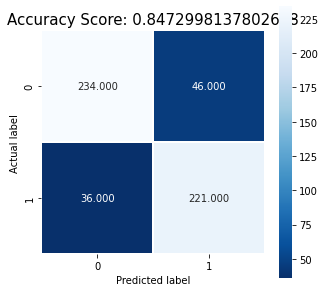

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()
#plt.savefig('Logistic confusion matrix')